<a href="https://www.kaggle.com/code/vijaykumarphy068/flight-2?scriptVersionId=119024601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<b style="background-color: #636efa;">
   <h1 style="background-color:#636efa;font-size:300%;text-align:center;" > Filght Price Prediction </h1>
</b>

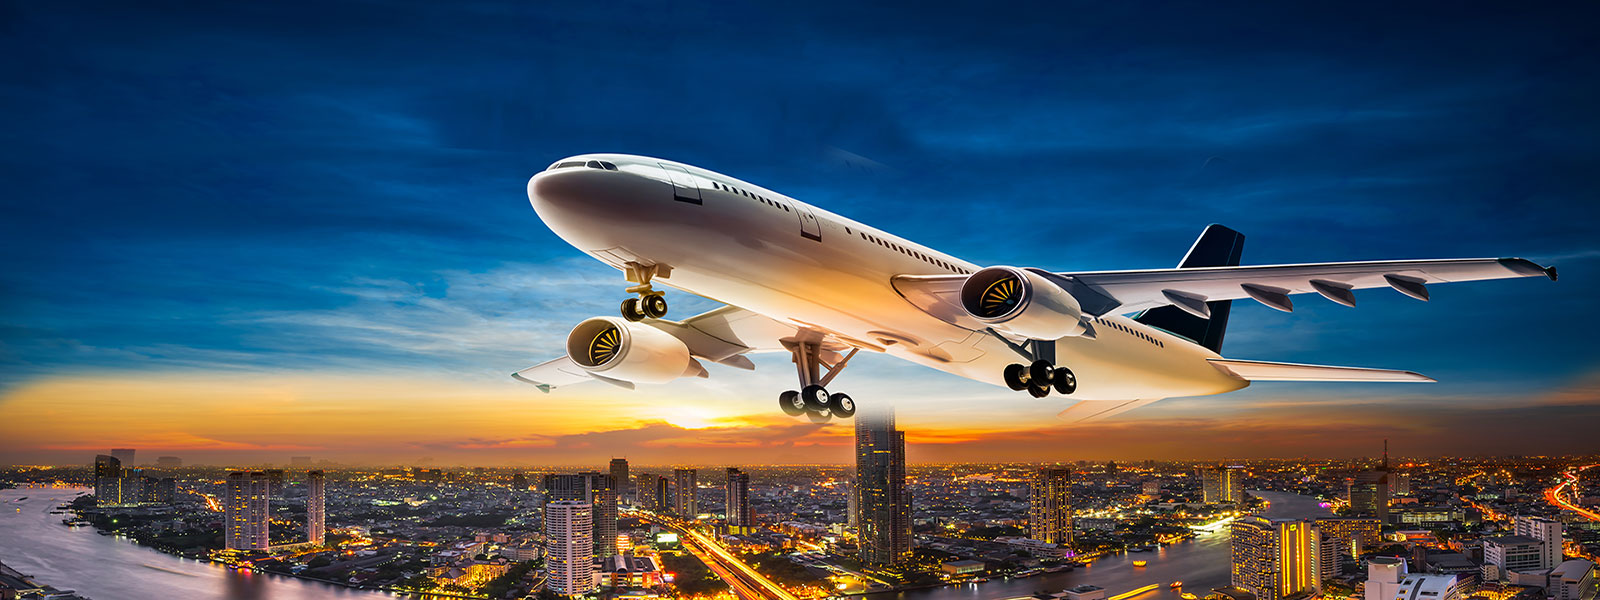

### **Problem Statement:**  We have a Dataset of `flight fares` of different flights that take off from various states. We won't use that date set to predict the flight fare of any flight


In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx
/kaggle/input/flight-image/flight02.jpg


In [2]:
!pip install plotly --upgrade --quiet

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Fig settings

plt.style.use('seaborn-poster')
plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# <p style="background-color:#636efa;font-size:100%;textalign:center;">Loading and understanding the  Data</p>

In [5]:
# Load Data sets

train_df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
test_df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')

In [6]:
# train_df = train_df_orginal.copy()
# test_df = test_df_orginal.copy()

# Shape and size of data sets 

print('train size',train_df.shape)
print('test size',test_df.shape)

train size (10683, 11)
test size (2671, 10)


In [7]:
# Top 5 rows of train set
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Top 5 rows of train set
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
# Info of train data 


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# Info of test data 


test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
# Checking null value in train set

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only two nan value in train set one in  Route column and other in Total_Stops

In [12]:
# Checking null value in test set

test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Test set is clear 

In [13]:
# Since there are only two nan we can drop them 


train_df = train_df.dropna(axis=0)

# <p style="background-color:#636efa;font-size:100%;text-align:center;" > Visualization </p>

In [14]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
train_df['Airline'].unique()  # unique values in Airline column

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
fig = px.box(
            train_df,
            x='Price',
            y='Airline',
            color='Airline',
            template='plotly_dark',
            title='Airlines price distributions',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1200,)

**insights**
> * Jet Airways Bussiness has highest fare.
> * Trujet has negligible distribution


In [17]:
fig = px.box(
            train_df,
            x='Price',
            y='Source',
            color='Source',
            template='plotly_dark',
            title='price distribution by Source',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1000,)

In [18]:
fig = px.box(
            train_df,
            x='Price',
            y='Destination',
            color='Destination',
            template='plotly_dark',
            title='price distribution by Destination',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1000,)

## <p style="background-color:#636efa;text-align:center;" > Step one for pipeline </p>


In [19]:
# Replace New delhi to Delhi because they are same ( Step one for pipeline )

def replace_new_delhi(df):
    # replace New Delhi to Delhi 
    df.apply(pd.Series.replace, to_replace='New Delhi', value='Delhi',inplace=True)
    # returning canged Data set
    return df
    
replace_new_delhi(train_df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [20]:
train_df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [21]:
train_df['Route'].nunique()

128

[Text(0.5, 1.0, 'Top 20 Route by Price')]

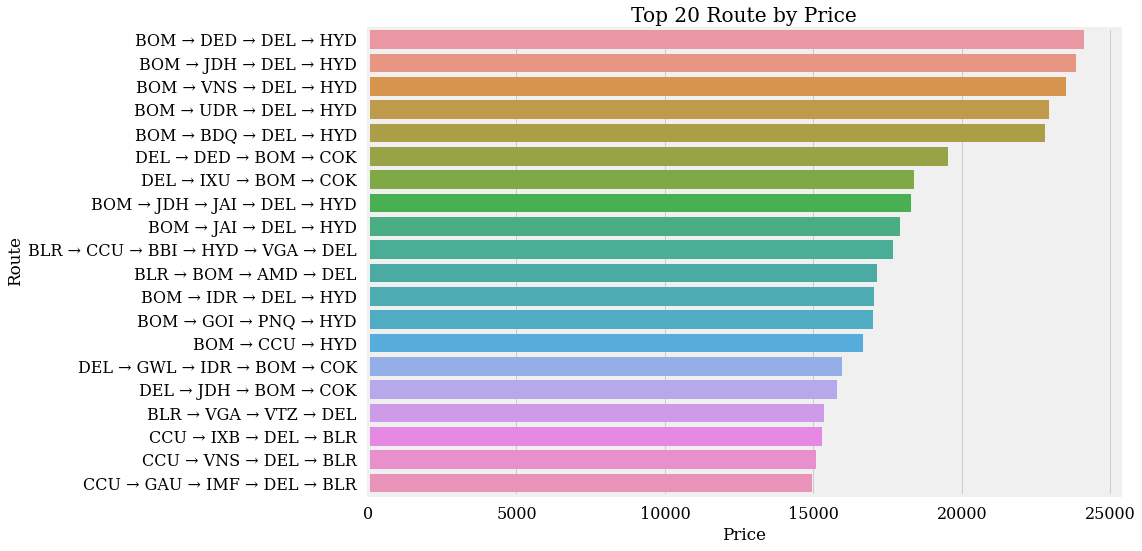

In [22]:
route = train_df.groupby("Route")['Price'].median().to_frame().sort_values("Price",ascending=False).reset_index()

sns.barplot(
            data=route.head(20),
            x='Price',
            y='Route',
).set(title='Top 20 Route by Price')

In [23]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
train_df.groupby(['Source', 'Destination'], as_index=False)['Price'].median()

,Source,Destination,Price
0,Banglore,Delhi,6121.0
1,Chennai,Kolkata,3850.0
2,Delhi,Cochin,10262.0
3,Kolkata,Banglore,9345.0
4,Mumbai,Hyderabad,3342.0


<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

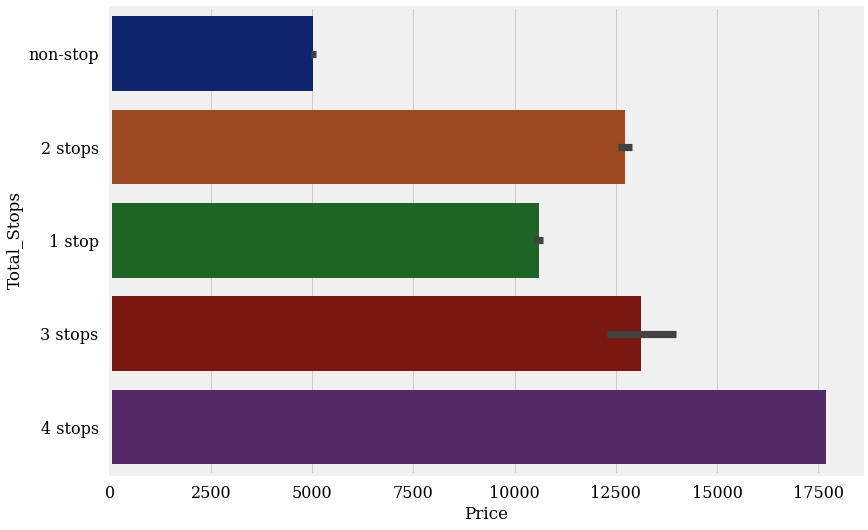

In [25]:
sns.barplot(
            data=train_df,
            y='Total_Stops',
            x="Price",
            palette='dark')

>Price also depend on Total_Stops. \
>we are now converting it into integer

#### Pipe step 2

In [26]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
## Converting Total_Stops columns into integers ( second step for pipeline)


def extract_stops(df):
    df['Total_Stops']=df['Total_Stops'].map(
                                            {'non-stop':0,
                                             '2 stops':2,
                                             '1 stop':1,
                                             '3 stops':3,
                                             '4 stops':4})
    return df


extract_stops(train_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [28]:
# train_df['Duration'].to_datetime()

train_df.sample(4)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10668,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2,No info,21219
6136,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:00,6h,1,In-flight meal not included,12373
7862,Jet Airways,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,12:00 22 May,16h,1,No info,14781
5756,IndiGo,15/04/2019,Delhi,Cochin,DEL → HYD → COK,05:05,12:10,7h 5m,1,No info,6287


In [29]:
len(train_df['Duration'][0].split())

2

#### Step 3 for pipeline

In [30]:
# Handel duration columns extract no. of minute from from duration ( Step 3 for pipeline)
def duration_handling(df):
    duration=list(df['Duration'])
    for i in range(len(duration)):
        if len(duration[i].split(' '))==2: # if lenght is 2 that mean we  hour both hours and minutes
            pass
        else:
            if 'h' in duration[i]: # Check if duration contains only hour
                 duration[i]=duration[i] + ' 0m' # Adds 0 minute
            else:
                 duration[i]='0h '+ duration[i]  # Adds 0 hours
    Total_min_t = []
    for i in range(len(duration)):
        hours = int(duration[i].split(' ')[0][:-1])*60 # Convert hours into min 
        mins = int(duration[i].split(' ')[1][:-1])
        Total_min = hours + mins
        Total_min_t.append(Total_min)
    df['Total_duration_min']=Total_min_t
    return df

In [31]:
# pass train_df from function


duration_handling(train_df).head() # As it will return DataFrame we use head function ere

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285


### Extract date, month, and weekday from Journey columm

#### Step 4 for pipeline

In [32]:
### Extract date, month, and weekday from Journey columm( Step 4 for pipeline)

def journey_day(df):
        df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
        df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
        df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday
        return df

In [33]:
journey_day(train_df).head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min,Journey_Day,Journey_Month,weekday
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325,12,5,6
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285,1,3,4


### Extract Arrival time and Departure time

#### step 5 for pipeline

In [34]:
### Extract Arrival time and Departure time


def Arrival_and_dep(df):
        # Arrival_time
        df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
        df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
        
        #
        df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
        df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
        return df

In [35]:
## passing from function

Arrival_and_dep(train_df).head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170,24,3,6,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445,1,5,2,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140,9,6,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325,12,5,6,23,30,18,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285,1,3,4,21,35,16,50


In [36]:

px.bar(
            train_df.groupby('Journey_Month')['Price'].mean().to_frame().reset_index(),
            x='Journey_Month',
            y='Price',
            template = 'plotly_dark',
            title='Journey_Month vs Price'

        )

In [37]:

px.bar(
            train_df.groupby('Journey_Day')['Price'].mean().to_frame().reset_index(),
            x='Journey_Day',
            y='Price',
            template = 'plotly_dark',
            title='Journey_Day vs Price'

        )

In [38]:

px.bar(
            train_df.groupby('weekday')['Price'].mean().to_frame().reset_index(),
            x='weekday',
            y='Price',
            template = 'plotly_dark',
            title='weekday vs Price'

        )

In [39]:
train_df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Arrival_min', 'Dep_hour',
       'Dep_min'],
      dtype='object')

In [40]:

px.bar(
            train_df.groupby('Dep_hour')['Price'].mean().to_frame().reset_index(),
            x='Dep_hour',
            y='Price',
            template = 'plotly_dark',
            title='Dep_hour vs Price'

        )


In [41]:

px.bar(
            train_df.groupby('Arrival_hour')['Price'].mean().to_frame().reset_index(),
            x='Arrival_hour',
            y='Price',
            template = 'plotly_dark',
            title='Arrival_hour vs Price'

        )


In [42]:
## Now next is all preprocessing

In [43]:

px.bar(
            train_df.groupby('Additional_Info')['Price'].mean().to_frame().reset_index(),
            x='Additional_Info',
            y='Price',
            template = 'plotly_dark',
            title='Additional_Info vs Price'

        )


**insights**
> * Price also depend upon `Additional_Info`column
> * There are promble there to No info one capital I another one with small i we can make them same or we can leave them as it is 

In [44]:
test_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [45]:
train_df.apply(pd.Series.replace, to_replace='No Info', value='No info',inplace=True)

Airline               None
Date_of_Journey       None
Source                None
Destination           None
Route                 None
Dep_Time              None
Arrival_Time          None
Duration              None
Total_Stops           None
Additional_Info       None
Price                 None
Total_duration_min    None
Journey_Day           None
Journey_Month         None
weekday               None
Arrival_hour          None
Arrival_min           None
Dep_hour              None
Dep_min               None
dtype: object

In [46]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# <p style="background-color:#636efa;font-size:100%;text-align:center;" > Select columns for input </p>


In [47]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Arrival_min', 'Dep_hour',
       'Dep_min'],
      dtype='object')

In [48]:
'Date_of_Journey','Route','Dep_Time','Arrival_Time', 'Duration','Arrival_min','Dep_min'

('Date_of_Journey',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Arrival_min',
 'Dep_min')

#### step 6 for pipeline (input columns selction)

In [49]:
y = train_df['Price']
input_cols_list = ['Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour',]
def input_cols(df):
    return df[input_cols_list]

In [50]:
X=input_cols(train_df)
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Dep_hour
0,IndiGo,Banglore,Delhi,0,No info,170,24,3,6,1,22
1,Air India,Kolkata,Banglore,2,No info,445,1,5,2,13,5
2,Jet Airways,Delhi,Cochin,2,No info,1140,9,6,6,4,9
3,IndiGo,Kolkata,Banglore,1,No info,325,12,5,6,23,18
4,IndiGo,Banglore,Delhi,1,No info,285,1,3,4,21,16


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)



In [52]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Dep_hour
8454,Jet Airways,Delhi,Cochin,0,In-flight meal not included,195,27,5,0,14,11
8423,Jet Airways,Delhi,Cochin,1,In-flight meal not included,660,9,5,3,19,8
10179,Multiple carriers,Delhi,Cochin,1,No info,545,3,6,0,16,7
3880,Jet Airways,Kolkata,Banglore,1,In-flight meal not included,1655,9,6,6,23,20
6176,Jet Airways,Delhi,Cochin,1,In-flight meal not included,450,27,6,3,4,20


#   <p style="background-color:#636efa;font-size:100%;text-align:center;" > Encoding</p>


In [53]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Airline','Source','Destination','Additional_Info']
# def OneHotEncoder_function(train_set,val_set,test_set,categorical_cols_list):
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X_train[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])


Join agian after encoding

In [54]:
numeric_cols = ['Total_Stops','Total_duration_min','Journey_Day','Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour']

In [55]:
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]


In [56]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,7156.0,0.827138,0.675535,0.0,0.0,1.0,1.0,4.0
Total_duration_min,7156.0,643.225266,508.713833,5.0,175.0,510.0,935.0,2860.0
Journey_Day,7156.0,13.591951,8.467329,1.0,6.0,12.0,21.0,27.0
Journey_Month,7156.0,4.713108,1.163984,3.0,3.0,5.0,6.0,6.0
weekday,7156.0,2.928032,2.006208,0.0,1.0,3.0,5.0,6.0
Arrival_hour,7156.0,13.280743,6.894361,0.0,8.0,14.0,19.0,23.0
Dep_hour,7156.0,12.446618,5.757681,0.0,8.0,11.0,17.0,23.0
Airline_Air Asia,7156.0,0.029486,0.169175,0.0,0.0,0.0,0.0,1.0
Airline_Air India,7156.0,0.163639,0.369973,0.0,0.0,0.0,0.0,1.0
Airline_GoAir,7156.0,0.019005,0.136552,0.0,0.0,0.0,0.0,1.0


# <p style="background-color:#636efa;font-size:100%;text-align:center;" > Model training </p>


In [57]:
from xgboost import XGBRegressor

In [58]:
xg_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
xg_model_on_log = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [59]:
%%time
xg_model.fit(X_train, y_train)

xg_model_on_log.fit(X_train, np.log10(y_train))


CPU times: user 1.28 s, sys: 11.1 ms, total: 1.29 s
Wall time: 341 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [61]:
#train and validation loss

# to make font bold
start = "\033[1m" 
end = "\033[0;0m"

# function to print loss and prediction
def loss_predict(a,b):
    print('rmse: ',rmse(a,b))
    print('mae: ',mean_absolute_error(a,b))

# function which print loss and 
def training_and_validation_loss(models):
    # trainling prediction and loss
    train_preds = models.predict(X_train)
    print('training prediction : ',train_preds)
    print(start + 'training loss'+ end )
    loss_predict(y_train,train_preds)
    print('R2 score',r2_score(y_train, train_preds))
    
    print(40 * '=*=')
    
    # training prediction and loss
    test_preds = models.predict(X_test)
    print('validation prediction : ',test_preds)
    print(start + 'validation loss'+ end )
    loss_predict(y_test,test_preds)
    print('R2 score',r2_score(y_test, test_preds))
    
    
# function which print loss and on log10 prediction
def training_and_validation_loss_onlog(models):
    # trainling prediction and loss
    train_preds = 10**(models.predict(X_train))
    print('training prediction : ',train_preds)
    print(start + 'training loss'+ end )
    loss_predict(y_train,train_preds)
    print('R2 score',r2_score(y_train, train_preds))
    
    print(40 * '=*=')
    
    # training prediction and loss
    test_preds = 10**(models.predict(X_test))
    print('validation prediction : ',test_preds)
    print(start + 'validation loss'+ end )
    loss_predict(y_test,test_preds)
    print('R2 score',r2_score(y_test, test_preds))

In [62]:
training_and_validation_loss(xg_model)
print(40*'=','on_log',40*'=')
training_and_validation_loss_onlog(xg_model_on_log)


training prediction :  [ 6999.5713 11002.291  10593.751  ...  9987.8955  7590.542  10445.954 ]
training loss
rmse:  1897.3070294921597
mae:  1230.4743557157565
R2 score 0.8352168811133233
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
validation prediction :  [15553.422   7304.9717  8754.709  ...  8310.856   7778.3955 10684.372 ]
validation loss
rmse:  1841.7492744038134
mae:  1238.9623889111688
R2 score 0.8310189117476492
======================================== on_log ========================================
training prediction :  [ 6728.342 10720.658  9935.108 ...  9876.432  6910.451 10744.45 ]
training loss
rmse:  2038.716512245111
mae:  1229.0684181754984
R2 score 0.809738389798576
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
validation prediction :  [15044.613  6287.654  8887.821 ...  8164.119  6946.73   9893.672]
validation loss
rm

In [63]:
## try random forest model 
from sklearn.ensemble import RandomForestRegressor

In [64]:
rnd_model = RandomForestRegressor()
rnd_model_on_log = RandomForestRegressor()

rnd_model.fit(X_train, y_train)
rnd_model_on_log.fit(X_train, np.log10(y_train))



RandomForestRegressor()

In [65]:
training_and_validation_loss(rnd_model)
print(40*'=','on_log',40*'=')
training_and_validation_loss_onlog(rnd_model_on_log)


training prediction :  [ 7277.65      11730.16      10718.18      ...  7907.8        6515.4592381
 10275.65     ]
training loss
rmse:  676.2638416282535
mae:  292.43590328699236
R2 score 0.9790651515390878
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
validation prediction :  [16722.05        5524.07        8928.14       ...  6527.05
  9292.48       11694.53583333]
validation loss
rmse:  1525.964397252635
mae:  719.0625411996145
R2 score 0.8839978896909771
======================================== on_log ========================================
training prediction :  [ 7270.27253244 11764.63251114 10420.54519683 ...  7860.73236455
  6513.7611179  10274.82341957]
training loss
rmse:  799.4724491585013
mae:  302.9949413967645
R2 score 0.9707420097372815
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
validation prediction :  [16539.69490046  5

In [66]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rnd_model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)


,feature,importance
1,Total_duration_min,0.457762
34,Additional_Info_In-flight meal not included,0.075701
2,Journey_Day,0.072620
12,Airline_Jet Airways Business,0.070135
11,Airline_Jet Airways,0.057413
3,Journey_Month,0.049304
5,Arrival_hour,0.035412
0,Total_Stops,0.030524
6,Dep_hour,0.028973
4,weekday,0.027306


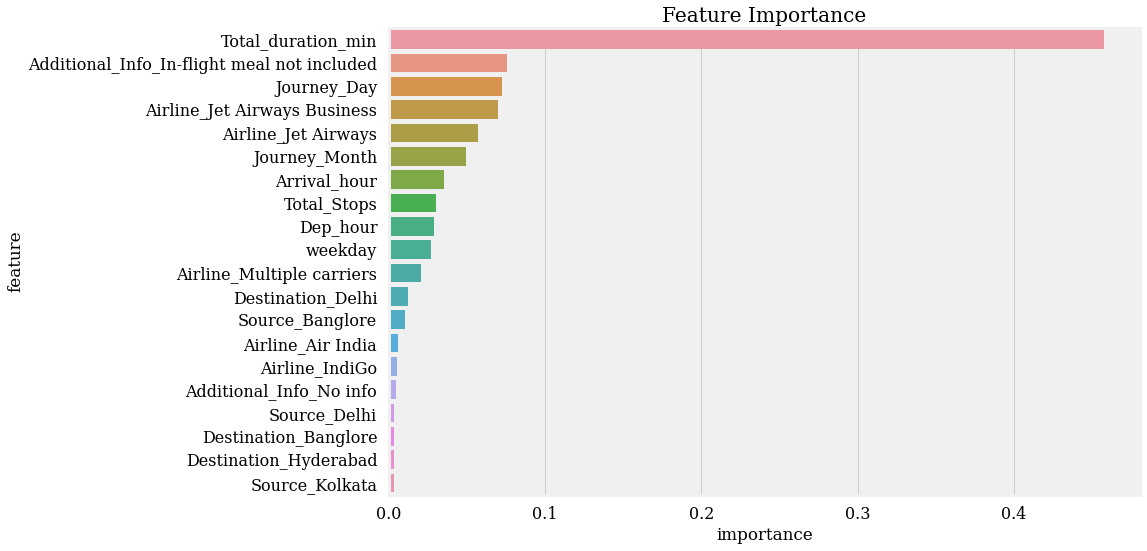

In [67]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x='importance', y='feature');

#### try with another features

In [68]:
importance_df.head(15)['feature'].unique()

array(['Total_duration_min',
       'Additional_Info_In-flight meal not included', 'Journey_Day',
       'Airline_Jet Airways Business', 'Airline_Jet Airways',
       'Journey_Month', 'Arrival_hour', 'Total_Stops', 'Dep_hour',
       'weekday', 'Airline_Multiple carriers', 'Destination_Delhi',
       'Source_Banglore', 'Airline_Air India', 'Airline_IndiGo'],
      dtype=object)

In [69]:
X_train[importance_df.head(15)['feature'].unique()].head(3)

,Total_duration_min,Additional_Info_In-flight meal not included,Journey_Day,Airline_Jet Airways Business,Airline_Jet Airways,Journey_Month,Arrival_hour,Total_Stops,Dep_hour,weekday,Airline_Multiple carriers,Destination_Delhi,Source_Banglore,Airline_Air India,Airline_IndiGo
8454,195,1.0,27,0.0,1.0,5,14,0,11,0,0.0,0.0,0.0,0.0,0.0
8423,660,1.0,9,0.0,1.0,5,19,1,8,3,0.0,0.0,0.0,0.0,0.0
10179,545,0.0,3,0.0,0.0,6,16,1,7,0,1.0,0.0,0.0,0.0,0.0


In [70]:
rnd_model_2 = RandomForestRegressor()
rnd_model_2.fit(X_train[importance_df.head(20)['feature'].unique()], y_train)



RandomForestRegressor()

In [71]:
# trainling prediction and loss
train_preds = rnd_model_2.predict(X_train[importance_df.head(20)['feature'].unique()])
print('training prediction : ',train_preds)
print(start + 'training loss'+ end )
loss_predict(y_train,train_preds)

# validation prediction and loss
test_preds = rnd_model_2.predict(X_test[importance_df.head(20)['feature'].unique()])
print('validation prediction : ',test_preds)
print(start + 'validation loss'+ end )
loss_predict(y_test,test_preds)

training prediction :  [ 7522.37       11710.68       10430.19       ...  7697.32
  6523.82333333 10275.65      ]
training loss
rmse:  689.4011754337747
mae:  308.98067795478545
validation prediction :  [16726.6         5546.44        8838.87       ...  6321.51
  8850.61       11480.69533333]
validation loss
rmse:  1595.2043219407938
mae:  759.4232494744258


In [72]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

training_and_validation_loss(model_linear)

training prediction :  [ 5535.22915324  9779.41022917 10815.7114831  ... 11266.26568899
  6329.92959886 10385.29320163]
training loss
rmse:  2631.9607935255135
mae:  1776.925571576056
R2 score 0.6828999443371907
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
validation prediction :  [13658.7805362   6915.5103336   9611.11047504 ...  8723.67163982
  7803.07316671 11560.38643245]
validation loss
rmse:  2517.484546311203
mae:  1744.1648962665633
R2 score 0.6842737332301085


#### Important Points
* Random forest gives best result from all the models 
* From now we carry forward with randome forest model 

# <p style="background-color:#636efa;font-size:100%;text-align:center;" > Hyperparameter tuning </p>


In [73]:
def test_params(**params):
    rnd = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    rnd.fit(X_train, y_train)
    y_pred = rnd.predict(X_train)
    train_rmse = rmse(y_train,y_pred)
    test_pred = rnd.predict(X_test)
    test_rmse = rmse(y_test,test_pred)
    print('Train rmse: {}, test rmse: {}'.format(train_rmse, test_rmse))
    return train_rmse,test_rmse

In [74]:
test_params(max_depth=10)

Train rmse: 1324.7179488014845, test rmse: 1704.3186404754424


(1324.7179488014845, 1704.3186404754424)

In [75]:
# Helper funtion to plot and check parameter values


def test_params_and_plot(param_name,values):
    train_errors , val_errors = [] , []
    for value in values:
        params = {param_name: value}
        train_rmse,test_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(test_rmse)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve:  params')
    plt.plot(values, train_errors, 'g-*')
    plt.plot(values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('rmse')
    plt.legend(['Training', 'Test'])

Train rmse: 2385.9905522616828, test rmse: 2366.4256513256855
Train rmse: 1324.7179488014845, test rmse: 1704.3186404754424
Train rmse: 858.5537166643682, test rmse: 1572.3623191312
Train rmse: 692.8798504731932, test rmse: 1556.3155966714228
Train rmse: 673.9050162257047, test rmse: 1547.7990786890944
Train rmse: 668.945907205008, test rmse: 1552.0868857814032
Train rmse: 667.9987528616929, test rmse: 1548.7314747227815


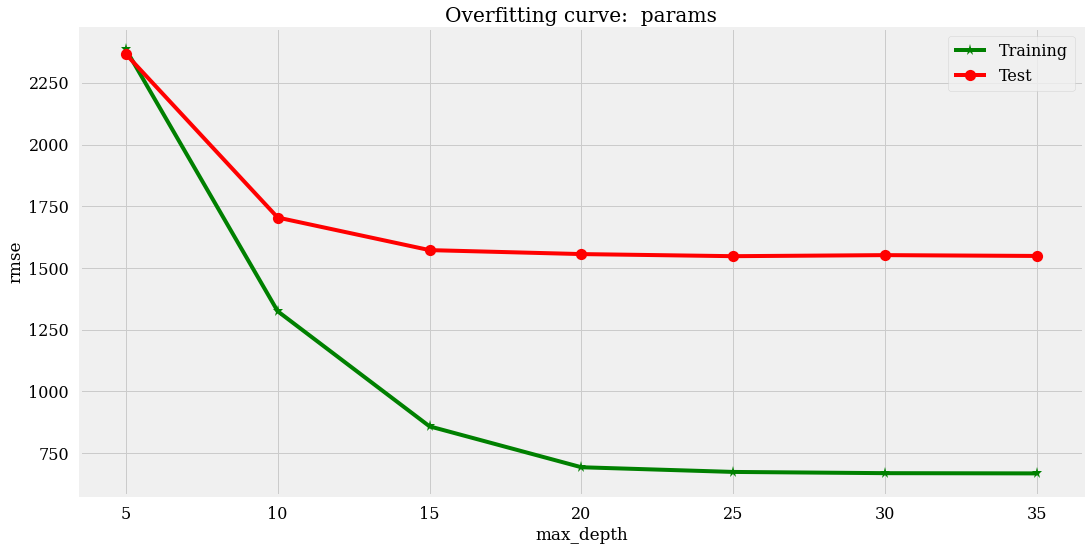

In [76]:
test_params_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

Train rmse: 667.9987528616929, test rmse: 1548.7314747227815
Train rmse: 759.0639510200122, test rmse: 1565.900451017539
Train rmse: 839.910880714531, test rmse: 1565.907192966222
Train rmse: 918.1671797202987, test rmse: 1577.9342579885006
Train rmse: 974.8250126492053, test rmse: 1591.746059125132


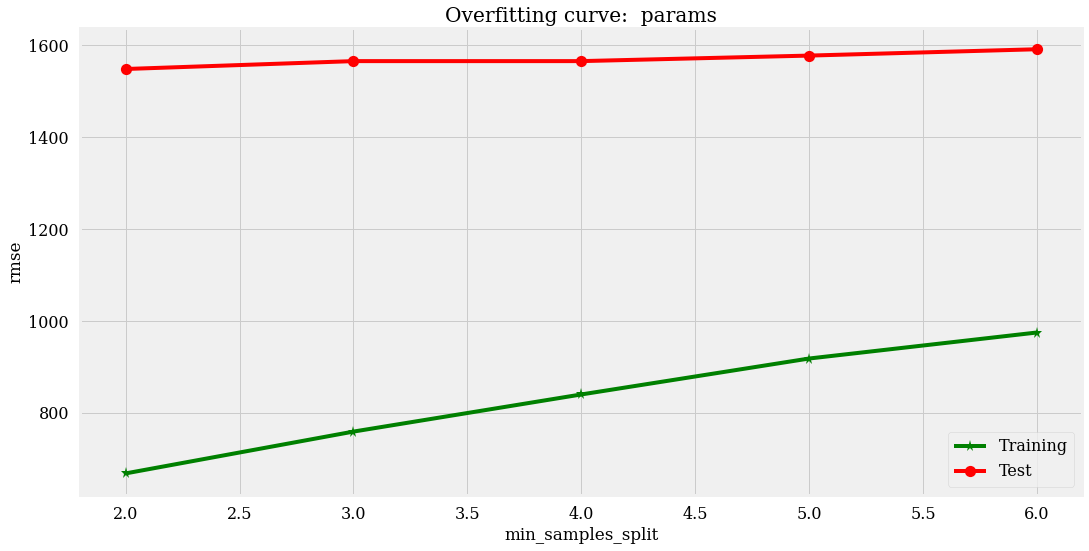

In [77]:
test_params_and_plot('min_samples_split',[ 2, 3, 4, 5, 6])

Train rmse: 667.9987528616929, test rmse: 1548.7314747227815
Train rmse: 994.4820360973758, test rmse: 1597.402733191025
Train rmse: 1201.5522539124916, test rmse: 1592.3956434893
Train rmse: 1370.77554298949, test rmse: 1595.4610830497252
Train rmse: 1641.1073073073492, test rmse: 1645.3360942641425


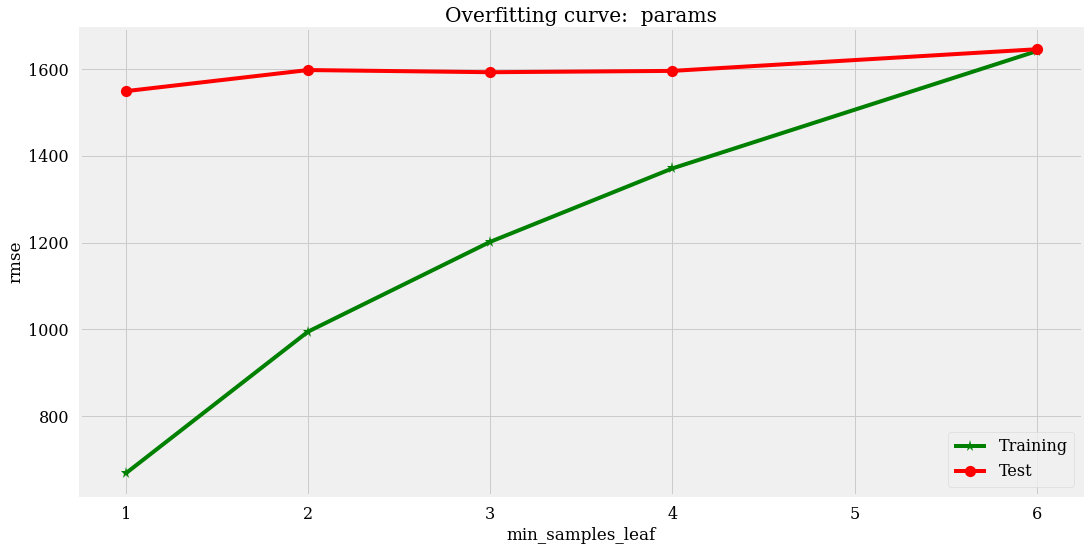

In [78]:
test_params_and_plot('min_samples_leaf',[ 1,2, 3,4,6])

Train rmse: 725.410356364722, test rmse: 1562.5848983894932
Train rmse: 692.2601607328764, test rmse: 1513.8962144144527
Train rmse: 678.630481294854, test rmse: 1493.1157823828455
Train rmse: 675.56276063804, test rmse: 1491.675437484345
Train rmse: 661.5066608493614, test rmse: 1482.7633040774042
Train rmse: 655.9188103212658, test rmse: 1470.3921184209169
Train rmse: 658.3838062183144, test rmse: 1476.0777555568604
Train rmse: 662.1293697573725, test rmse: 1508.829473430269
Train rmse: 661.0044188968672, test rmse: 1527.0592565771049


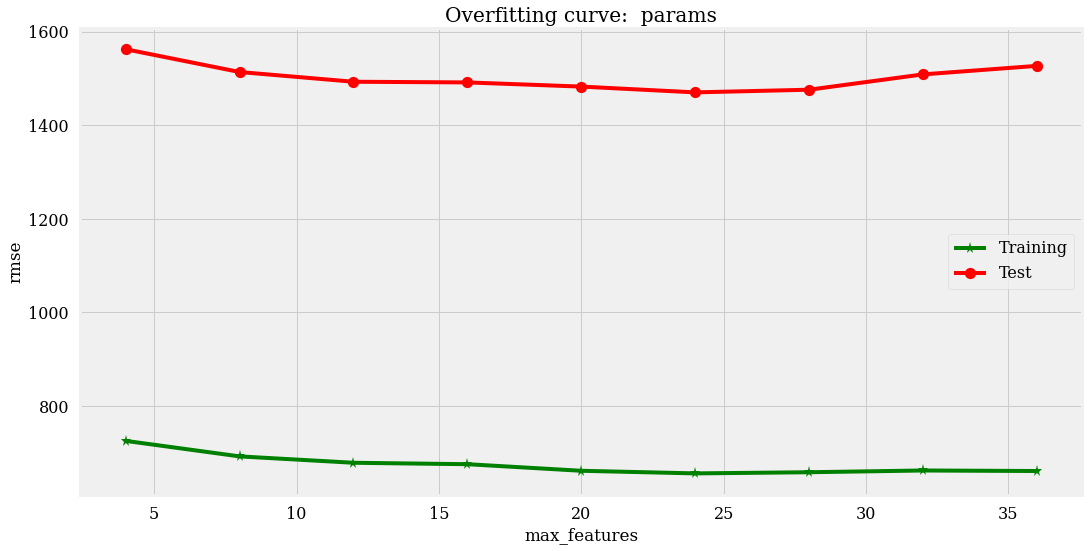

In [79]:
test_params_and_plot('max_features',[4,8,12,16,20,24,28,32,36 ])


Train rmse: 1782.1234035869425, test rmse: 1784.5084871350507
Train rmse: 1398.5399523165133, test rmse: 1643.7293773746787
Train rmse: 989.7270683254554, test rmse: 1574.3578612318254
Train rmse: 867.3339085090457, test rmse: 1580.3860569482551
Train rmse: 764.6922529940621, test rmse: 1556.3151775800136
Train rmse: 667.9987528616929, test rmse: 1548.7314747227815


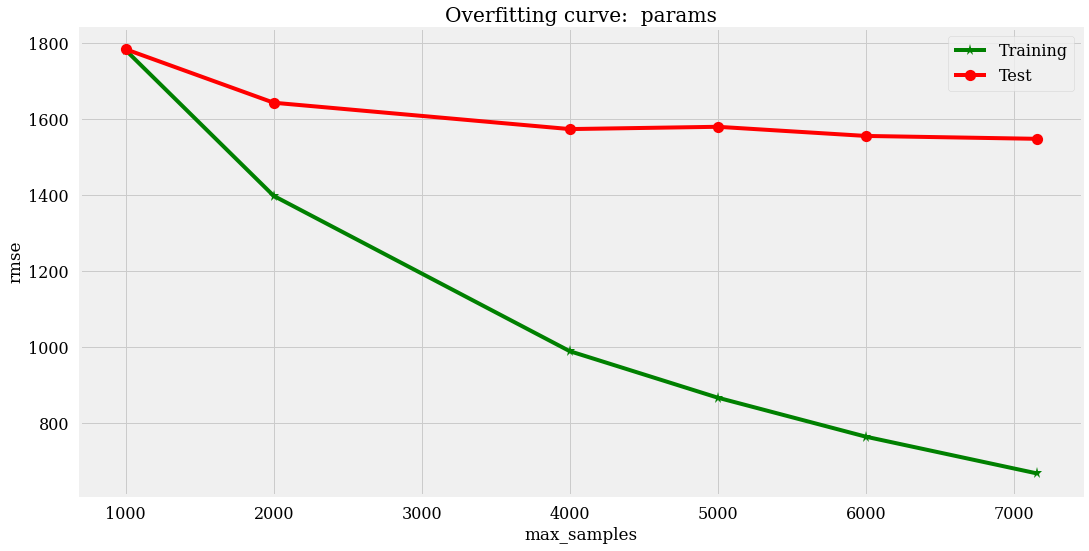

In [80]:
test_params_and_plot('max_samples',[1000,2000,4000,5000,6000,7156])

In [81]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Dep_hour
0,IndiGo,Banglore,Delhi,0,No info,170,24,3,6,1,22
1,Air India,Kolkata,Banglore,2,No info,445,1,5,2,13,5
2,Jet Airways,Delhi,Cochin,2,No info,1140,9,6,6,4,9
3,IndiGo,Kolkata,Banglore,1,No info,325,12,5,6,23,18
4,IndiGo,Banglore,Delhi,1,No info,285,1,3,4,21,16


In [82]:
categorical_cols = ['Airline','Source','Destination','Additional_Info']
# def OneHotEncoder_function(train_set,val_set,test_set,categorical_cols_list):
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [83]:
X = X[numeric_cols + encoded_cols]

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [85]:
kfold_validation=KFold(5)
rnd_model_3 = RandomForestRegressor(n_jobs=-1,
                                     random_state=42,
                                     max_depth=20,
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     max_features=24)
results=cross_val_score(rnd_model_3,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.89832644 0.87948091 0.90825172 0.90159955 0.89573954]
0.8966796306568089


In [86]:
print(np.max(results))
print(np.min(results))

0.9082517152561663
0.8794809089527003


Text(0.5, 1.0, 'Distribution of price')

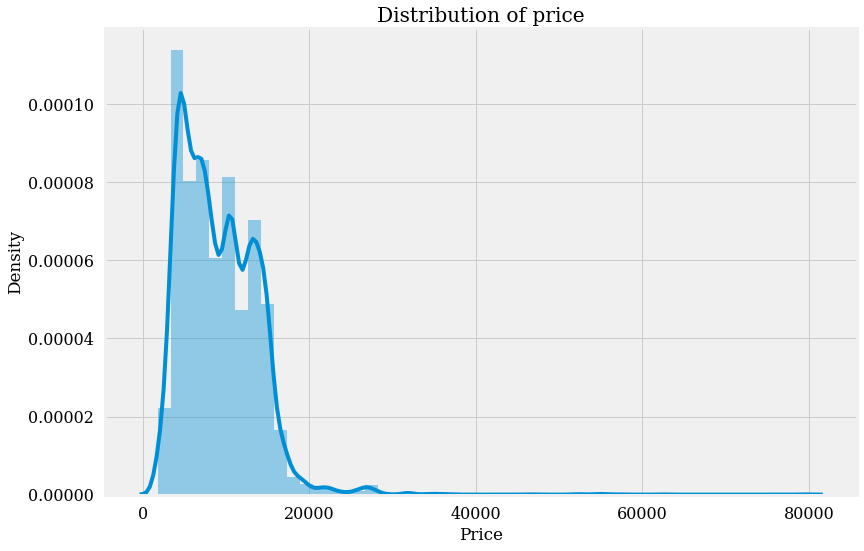

In [87]:
sns.distplot(y).set_title('Distribution of price')

In [88]:
rnd_model_4 = RandomForestRegressor(n_jobs=-1,
                                     random_state=42,
                                     max_depth=20,
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     max_features=24)
results_2=cross_val_score(rnd_model_4,X,np.log10(y),cv=kfold_validation)
print(results_2)
print(np.mean(results_2))
print(np.max(results_2))
print(np.min(results_2))

[0.93925089 0.93832214 0.9367585  0.92877502 0.93301693]
0.9352246946652348
0.9392508900992697
0.9287750168049868


# <p style="background-color:#636efa;font-size:100%;text-align:center;" > Pipeline </p>

In [89]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config

### <p style="background-color:#636efa;font-size:100%;text-align:center;" >We are building this pipeline </p>

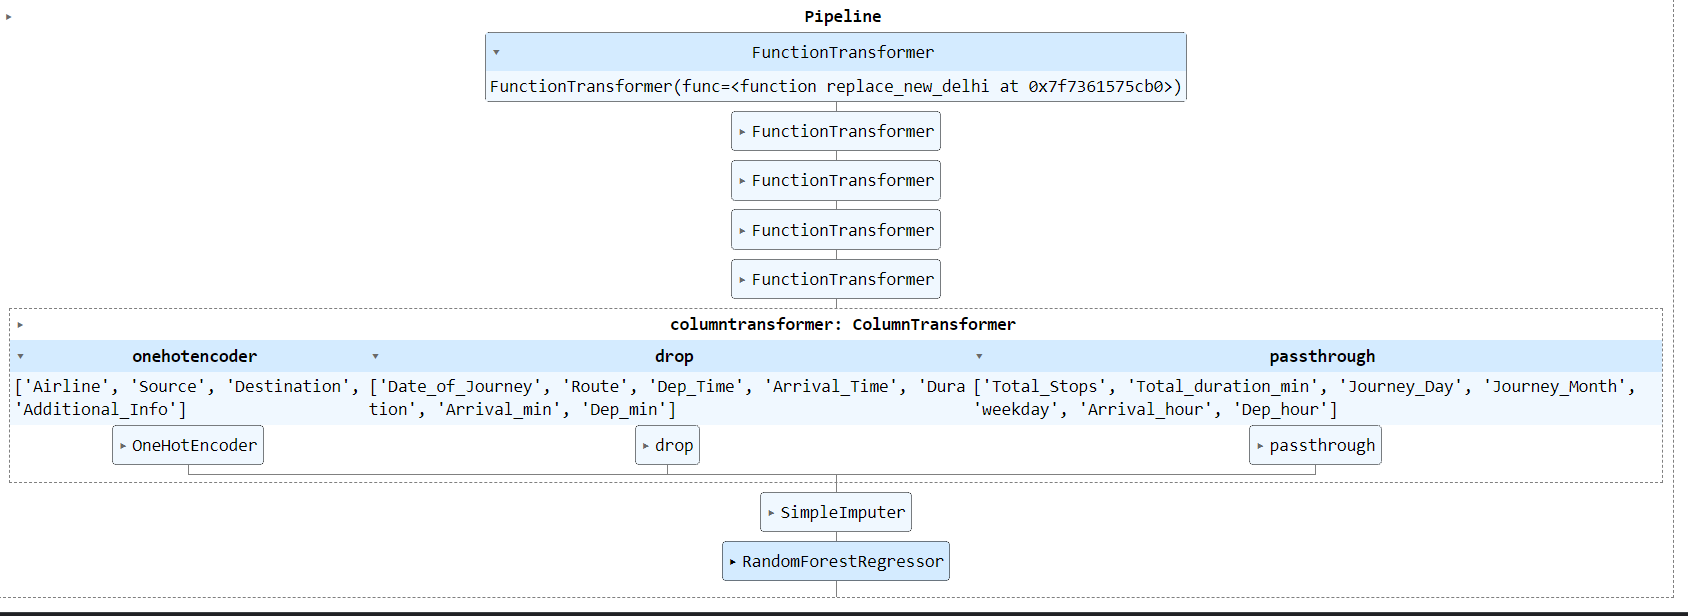

In [90]:
categorical_cols = ['Airline','Source','Destination','Additional_Info']
numeric_cols = ['Total_Stops','Total_duration_min','Journey_Day','Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour']


In [91]:
replace_new_delhi_transformation = FunctionTransformer(replace_new_delhi)
extract_stops_transformation = FunctionTransformer(extract_stops)
duration_handling_transformation = FunctionTransformer(duration_handling)
journey_day_transformation = FunctionTransformer(journey_day)
Arrival_and_dep_transformation = FunctionTransformer(Arrival_and_dep)



In [92]:
trf2 = make_column_transformer(
    (OneHotEncoder(sparse=False,drop=None,handle_unknown='ignore'), ['Airline','Source','Destination','Additional_Info']),
    ('drop',['Date_of_Journey','Route','Dep_Time','Arrival_Time', 'Duration','Arrival_min','Dep_min']),
    ('passthrough',[ 'Total_Stops', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour',]))

In [93]:
set_config(display="diagram")
pipe=make_pipeline(replace_new_delhi_transformation,
                   extract_stops_transformation,
                   duration_handling_transformation,
                   journey_day_transformation,
                   Arrival_and_dep_transformation,
                   trf2 ,
                   SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                   RandomForestRegressor(n_jobs=-1,
                                         random_state=42,
                                         max_depth=20,
                                         min_samples_split=2, 
                                         min_samples_leaf=1, 
                                         max_features=24))

In [94]:
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function replace_new_delhi at 0x7f645a8b3f80>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function extract_stops at 0x7f6458698950>)),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function duration_handling at 0x7f6458654050>)),
                ('functiontransformer-4',
                 FunctionTransformer(func=...
                                                   'Dep_Time', 'Arrival_Time',
                                                   'Duration', 'Arrival_min',
                                                   'Dep_min']),
                                                 ('passthrough', 'passthrough',
                                                  ['Total_Stops',
                                                   'Total_duration_min',
                                                   'Journey_Day',
                                                   'Journey_Month', 'weekday',
                                                   'Arrival_hour',
                                                   'Dep_hour'])])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features=24, n_jobs=-1,
                                       random_state=42))])

In [95]:
Xtrain=pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
y_final = Xtrain['Price']
X_final = Xtrain.loc[ : , Xtrain.columns != 'Price']

In [96]:
pipe.named_steps

{'functiontransformer-1': FunctionTransformer(func=<function replace_new_delhi at 0x7f645a8b3f80>),
 'functiontransformer-2': FunctionTransformer(func=<function extract_stops at 0x7f6458698950>),
 'functiontransformer-3': FunctionTransformer(func=<function duration_handling at 0x7f6458654050>),
 'functiontransformer-4': FunctionTransformer(func=<function journey_day at 0x7f6458654560>),
 'functiontransformer-5': FunctionTransformer(func=<function Arrival_and_dep at 0x7f645b1d2a70>),
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['Airline', 'Source', 'Destination',
                                   'Additional_Info']),
                                 ('drop', 'drop',
                                  ['Date_of_Journey', 'Route', 'Dep_Time',
                                   'Arrival_Time', '

In [97]:
pipe.fit(X_final,y_final)
# enc=pipe[2].fit(X_final,y_final)

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function replace_new_delhi at 0x7f645a8b3f80>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function extract_stops at 0x7f6458698950>)),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function duration_handling at 0x7f6458654050>)),
                ('functiontransformer-4',
                 FunctionTransformer(func=...
                                                   'Dep_Time', 'Arrival_Time',
                                                   'Duration', 'Arrival_min',
                                                   'Dep_min']),
                                                 ('passthrough', 'passthrough',
                                                  ['Total_Stops',
                                                   'Total_duration_min',
                                                   'Journey_Day',
                                                   'Journey_Month', 'weekday',
                                                   'Arrival_hour',
                                                   'Dep_hour'])])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features=24, n_jobs=-1,
                                       random_state=42))])

In [98]:
X_final

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,170,24,3,6,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,445,1,5,2,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,1140,9,6,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,325,12,5,6,23,30,18,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,285,1,3,4,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,150,9,4,1,22,25,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,155,27,4,5,23,20,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,180,27,4,5,11,20,8,20
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,160,1,3,4,14,10,11,30


In [99]:
y_pred = pipe.predict(X_final)

In [100]:
r2_score(y_final, y_pred)

0.8560625428826674

In [101]:
y_pred

array([ 5703.3585119 ,  8291.54283333, 15028.35154762, ...,
       10270.61      , 14425.86      ,  8525.6029734 ])

In [102]:
loss_predict(y_final,y_pred)

rmse:  1749.4258326651143
mae:  990.0378968122967
